## Plot Tag Id by read depth

Lorenz suggested that I plot tag against read depth to see if read depth has something to do with how tags are assigned. 

It looks like the individual ``.matches.tsv`` files have locus names based on the catalog (in common across individuals) and the number of reads contained in the locus. So I need to sum these across individuals.

In [2]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2


In [3]:
!printf "%s\n" *.matches.tsv > list_matches_filenames.txt

In [4]:
!head list_matches_filenames.txt

FG001.matches.tsv
FG002.matches.tsv
FG003.matches.tsv
FG004.matches.tsv
FG005.matches.tsv
FG006.matches.tsv
FG007.matches.tsv
FG009.matches.tsv
FG010.matches.tsv
FG011.matches.tsv


In [6]:
file_of_filenames = open("list_matches_filenames.txt","r")
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)

print filename_list[0:9]

['FG001.matches.tsv', 'FG002.matches.tsv', 'FG003.matches.tsv', 'FG004.matches.tsv', 'FG005.matches.tsv', 'FG006.matches.tsv', 'FG007.matches.tsv', 'FG009.matches.tsv', 'FG010.matches.tsv']


In [17]:
# initiate dictionary
rd_cum_dict = {}
ind_tag_counts = []

In [18]:
for file in filename_list:
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        ind_tag_counts.append(count)
        if locus not in rd_dict:
            rd__cum_dict[locus] = int(count)
        elif locus in rd_dict:
            oldcount = rd_dict[locus]
            newcount = oldcount + count
            rd_cum_dict[locus] = newcount
        else:
            print "Something funky is going on."
    indfile.close()
    printval = rd_cum_dict[5]
    print printval

213
503
645
778
968
1103
1195
1370
1532
1532
1794
1942
2106
2264
2436
2744
2944
3368
3477
3601
3766
4109
4408
4792
4945
5203
5203
5443
5443
5443
5748
5949
6108
6197
6350
6470
6588
6736
6879
7139
7279
7526
7734
7873
7980
8113
8363
8679
8861
9253
9553
9854
9983
10074
10459
10641
10788
10908
11043
11274
11560
11820
11912
12327
12521
12764
12855
12872
13066
13118
13380


In [10]:
locus_list = rd_dict.keys()
locus_list.sort()
locus_list[0:9]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
count_list = []
for locus in locus_list:
    count = rd_dict[locus]
    count_list.append(count)
print count_list[0:9]

[2880, 3489, 2335, 1837, 13380, 13497, 6914, 3665, 1560]


In [12]:
# double check
rd_dict[1]
rd_dict[2]
rd_dict[9]

1560

In [13]:
import matplotlib.pyplot as plt

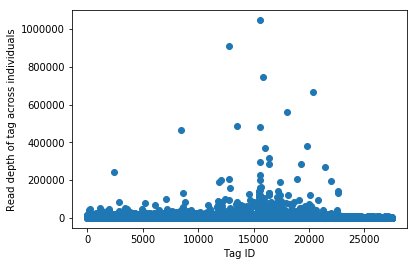

In [14]:
plt.scatter(locus_list, count_list)
plt.xlabel("Tag ID")
plt.ylabel("Read depth of tag across individuals")
plt.show()

Looks like no relationship to me!

## Further explore read depth

Something is behaving funky here, don't trust the plots below yet!

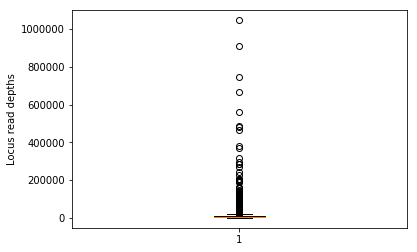

In [15]:
plt.boxplot(count_list)
plt.ylabel("Locus read depths")
plt.show()

In [20]:
# get individual count list for boxplot
ind_count_list = []

for file in filename_list:
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]
    for line in lines:
        linelist = line.strip().split()
        count = int(linelist[6])
        ind_count_list.append(count)
    indfile.close()

In [21]:
print ind_count_list[0:19]

[213, 249, 61, 3, 7, 278, 327, 28, 111, 205, 244, 188, 57, 63, 65, 1, 121, 124, 253]


In [30]:
import matplotlib.pyplot as plt

less_1000 = []
more_1000 = []
for count in ind_count_list:
    if count < 1000:
        less_1000.append(count)
    else:
        more_1000.append(count)

print str(float(len(less_1000))/float(len(ind_count_list))*100)[0:5] + "% of individual locus read depths were less than 1000"
print str(float(len(more_1000))/float(len(ind_count_list))*100)[0:5] + "% of individual locus read depths were more than 1000"

99.68% of individual locus read depths were less than 1000
0.319% of individual locus read depths were more than 1000


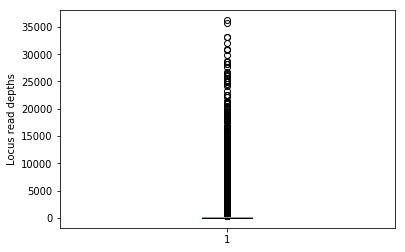

In [28]:
plt.close()
plt.boxplot(ind_count_list)
plt.ylabel("Locus read depths")
plt.show()

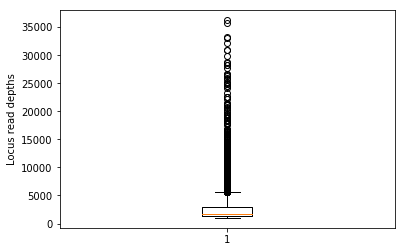

In [29]:
plt.close()
plt.boxplot(more_1000)
plt.ylabel("Locus read depths")
plt.show()

That can't be right... why does the y axis go so high?

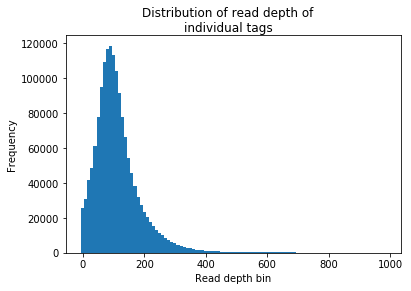

In [31]:
import numpy as np

plt.hist(ind_count_list, bins = np.arange(0,1000,10)-5)
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of read depth of\nindividual tags")
plt.show()

It occurred to me that it could be intereting to check whether the tags with the least read depth are also the funky ones. I could build simple loops to make lists of Catalog IDs with low, medium, and high read depth, and see if that's correlated to 

I'd measure "funk" by 